# MIP Robot Locomotion

## Preliminaries

The next lines setup some things and import the various libraries required to run this notebook.

Don't forget to initialize the server with:

    sudo pyctrl_start_server -m pyctrl.rc.drive


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Steering

A simplified kinematic model of a car steering in the plane is the following set of differential equations:

$$
\begin{aligned}
\dot{x} &= v \cos \theta \\
\dot{y} &= v \sin \theta \\
\omega = \dot{\theta} &= \frac{v}{\ell} \tan \psi
\end{aligned}
$$

where $\theta$ is the orientation of the car, $v$ is the car's forward velocity, $\ell$ the distance between the rear and front axes, and $\psi$ the front wheel steering angle.

## Driving with constant $v$ and constant $\psi$

### $v = 1$ and $\psi = 0$

In [25]:
from scipy.integrate import odeint
def steering(X, t, v, l, psi):
    x, y, theta = X
    dXdt = [v*np.cos(theta), v*np.sin(theta), (v/l)*np.tan(psi)]
    return dXdt

In [26]:
theta0 = np.pi/4
X0 = [0,0,theta0]
l = 0.1
T = 10
t = np.linspace(0, T, 101)

v = 1
psi = 0
sol = odeint(steering, X0, t, args=(v, l, psi))

<IPython.core.display.Javascript object>


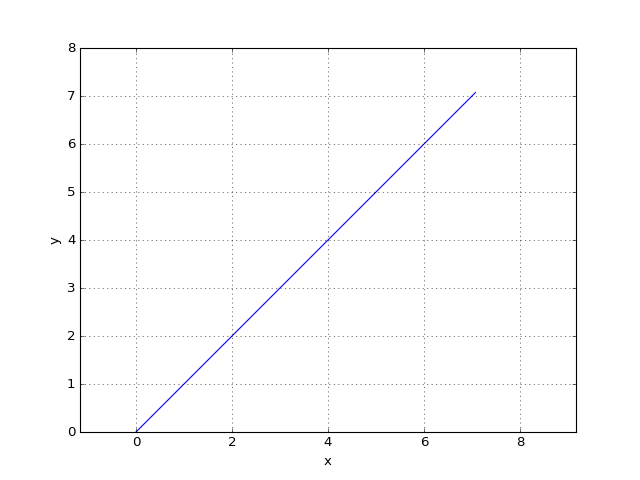

In [27]:
plt.figure()
plt.plot(sol[:, 0], sol[:, 1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


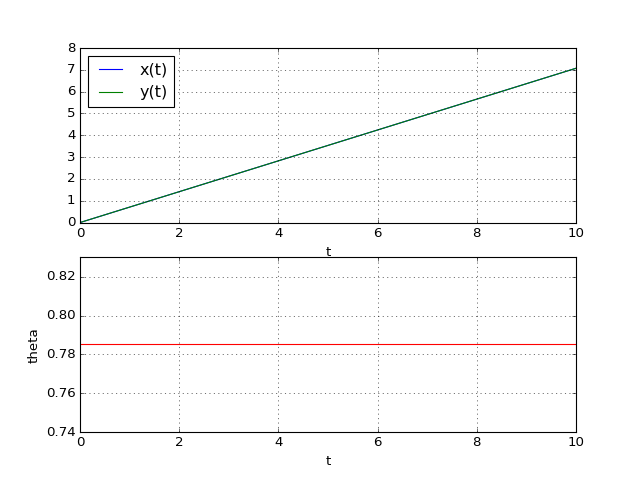

In [21]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, sol[:, 2], 'r', label='theta(t)')
plt.ylabel('theta')
plt.xlabel('t')
plt.grid()
plt.show()

$v = 1$, $\psi = \arctan \ell/R$

In [39]:
theta0 = 0
X0 = [0,0,theta0]
l = 0.1
T = 10
t = np.linspace(0, T, 101)

v = 1
rho = 1/2
psi = np.arctan(l/rho)
sol = odeint(steering, X0, t, args=(v, l, psi))

<IPython.core.display.Javascript object>


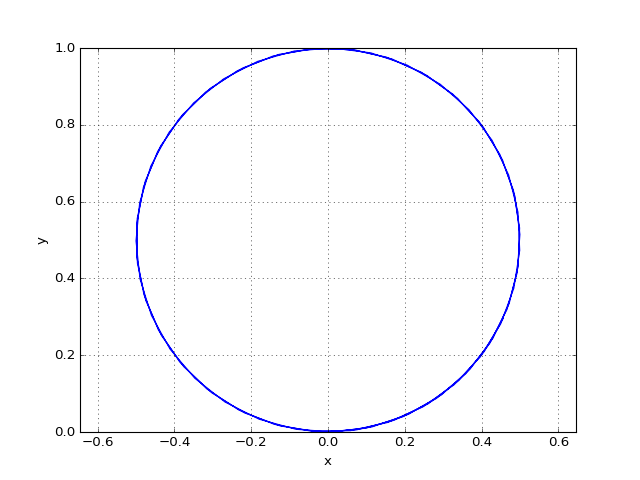

In [40]:
plt.figure()
plt.plot(sol[:, 0], sol[:, 1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


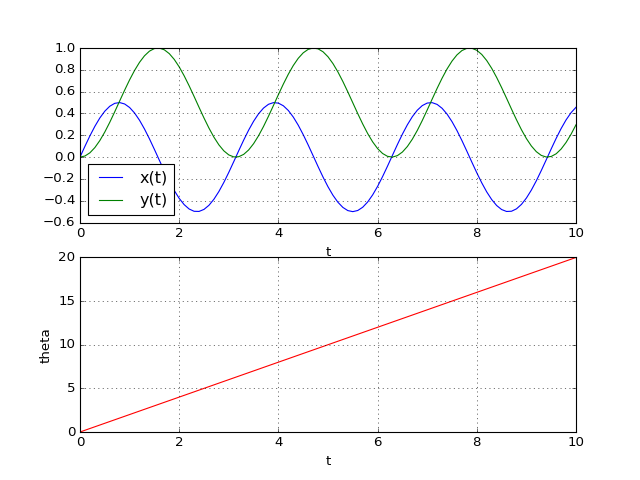

In [41]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, sol[:, 2], 'r', label='theta(t)')
plt.ylabel('theta')
plt.xlabel('t')
plt.grid()
plt.show()

## Driving with constant $v$ and variable $\psi$

<IPython.core.display.Javascript object>


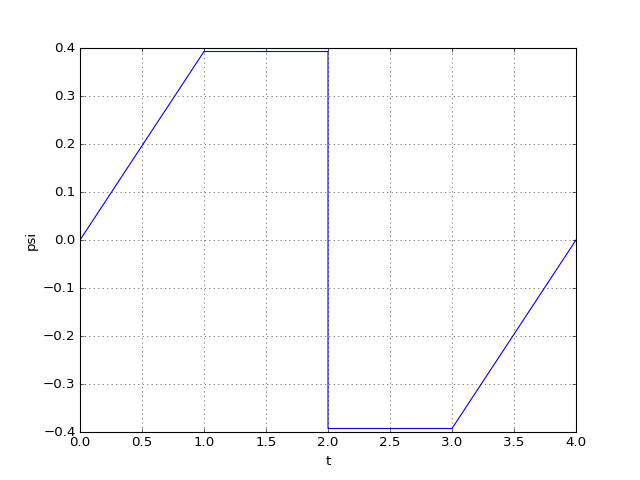

In [42]:
# build interpolated input signals
ts = np.array([0, 1, 2, 2, 3, 4])
psis = 0.25*(np.pi/2)*np.array([0, 1, 1, -1, -1, 0])

plt.figure()
plt.plot(ts, psis, 'b')
plt.xlabel('t')
plt.ylabel('psi')
plt.grid()
plt.show()

In [44]:
def steering(X, t, v, l, ts, psis):
    x, y, theta = X
    psi = np.interp(t, ts, psis)
    dXdt = [v*np.cos(theta), v*np.sin(theta), (v/l)*np.tan(psi)]
    return dXdt

In [45]:
from scipy.integrate import odeint
X0 = [0,0,0]
v = 1
l = 0.1
t = np.linspace(0, max(ts), 201)

sol = odeint(steering, X0, t, args=(v, l, ts, psis))

<IPython.core.display.Javascript object>


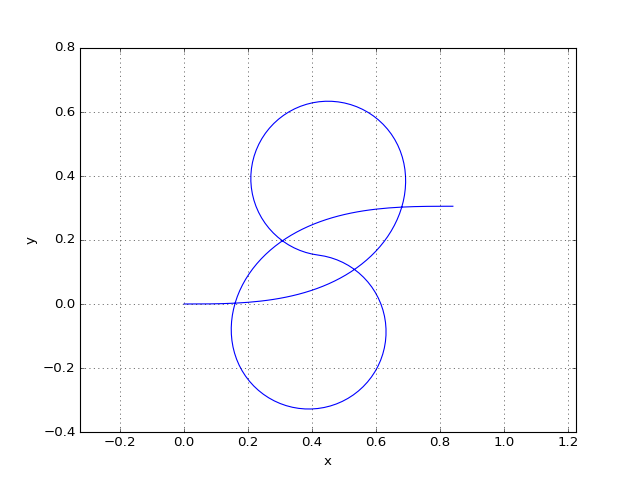

In [46]:
plt.figure()
plt.plot(sol[:, 0], sol[:, 1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


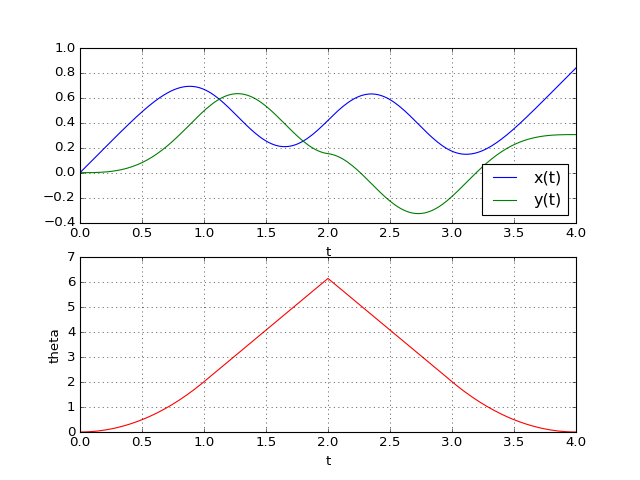

In [47]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='y(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, sol[:, 2], 'r', label='theta(t)')
plt.ylabel('theta')
plt.xlabel('t')
plt.grid()
plt.show()

## How does a two-wheeled robot move?

If a two-wheeled robot is moving in a circle of radius $R$ and $d$ is
the distance between the center of the robot axle and each wheel then

$$v_r = \omega \, (R + d/2), \quad 
  v_l = \omega \, (R - d/2)$$

where $v_l$ is the velocity of the *left* wheel, and $v_r$ is the
velocity of the *right* wheel.

1. Show that:

   $$R = \frac{d}{2} \frac{v_r + v_l}{v_r - v_l}, \quad \omega = \frac{v_r - v_l}{d}$$

2. What does the quantity:

   $$v = \omega \, R = \frac{v_r + v_l}{2}$$
    
   correspond to?

3. What happens when:
   1. $v_r > v_l > 0$
   2. $0 < v_r < v_l$
   3. $v_r = v_l$
   4. $v_r = 0$ or $v_l = 0$

4.  What is the effect of $d$ on the movement of the robot?
5.  Why would you choose a robot with a little $d$?
6.  Why would you choose a robot with a big $d$?
7.  How different is the movement of your robot from that of a regular car?

Now let $r$ be the radius of both left and right wheels and $\omega_l$ and
$\omega_r$ be the wheels' angular speed.

1.  Show that:

    $$R = \frac{d}{2} \frac{\omega_r + \omega_l}{\omega_r - \omega_l}, \quad \omega = \frac{r}{d} (\omega_r - \omega_l)$$

2.  Show that:

    $$v = \omega \, R = \frac{r}{2} (\omega_r + \omega_l)$$

3.  What happens when:
    1.   $\omega_r = \omega_l$
    2.   $\omega_r = - \omega_l$
    3.   $\omega_r = 0$ or $\omega_l = 0$

Since $R$ can be very large, it is often more convenient to work with the *curvature*:

$$\kappa = R^{-1} = \frac{2}{\ell} \frac{\omega_r - \omega_l}{\omega_r + \omega_l}$$